**Algoritmo de Agrupamento Kmeans**

**Código baseado em:**

1) https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

2) https://realpython.com/k-means-clustering-python/

In [2]:
!pip install plotly --upgrade
!pip install kneed #To install only knee-detection algorithm
!pip install matplotlib
!pip install matplotlib seaborn
!pip install matplotlib seaborn scikit-learn plotly kneed

ERROR: Invalid requirement: '#To': Expected package name at the start of dependency specifier
    #To
    ^


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 19.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 20.4 MB/s eta 0:00:00


In [3]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

QUESTÃO 1

In [29]:
import pandas as pd
base= pd.read_csv('Iris.csv', encoding='cp1252')
base
num_cols = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
df = base.copy()
def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
    return df_out
df_no_outliers = remove_outliers_iqr(df, num_cols)
print(f"Tamanho original: {df.shape}, Tamanho após remover outliers: {df_no_outliers.shape}")


Tamanho original: (150, 5), Tamanho após remover outliers: (146, 5)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_no_outliers[num_cols]
X_scaled = scaler.fit_transform(X)
print("Dados normalizados (primeiras 5 linhas):\n", X_scaled[:5])


Dados normalizados (primeiras 5 linhas):
 [[-0.9105154   1.1757891  -1.3748782  -1.34589856]
 [-1.15112218 -0.09392398 -1.3748782  -1.34589856]
 [-1.39172896  0.41396125 -1.43198551 -1.34589856]
 [-1.51203236  0.16001863 -1.31777088 -1.34589856]
 [-1.03081879  1.42973171 -1.3748782  -1.34589856]]


END QUESTÃO 1

In [19]:
Entrada = base.iloc[:, 0:4].values
Entrada.shape

(150, 4)

In [20]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [21]:
Entrada

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Para analisar Silhouette:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [22]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.444
Silhouette Score k = 5: 0.438
Silhouette Score k = 6: 0.355
Silhouette Score k = 7: 0.307
Silhouette Score k = 8: 0.334


**WCSS - Within Clusters Sum of Squares = é a soma dos quadrados dentro dos clusters**
https://rpubs.com/diascodes/770518

Veja: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [23]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada)
  wcss.append(kmeans.inertia_)

**Usando o método Elbow para encontrar o número ideal de clusters**

In [24]:
wcss

[12.143688281579719,
 7.138647703985377,
 5.549759171192483,
 4.999716015487786,
 4.435974100749334,
 4.148564120879137,
 3.152308877970635,
 3.0668244428901104,
 2.7463599552773736]

**Vamos analisar o ponto de inflexão dessa curva?**

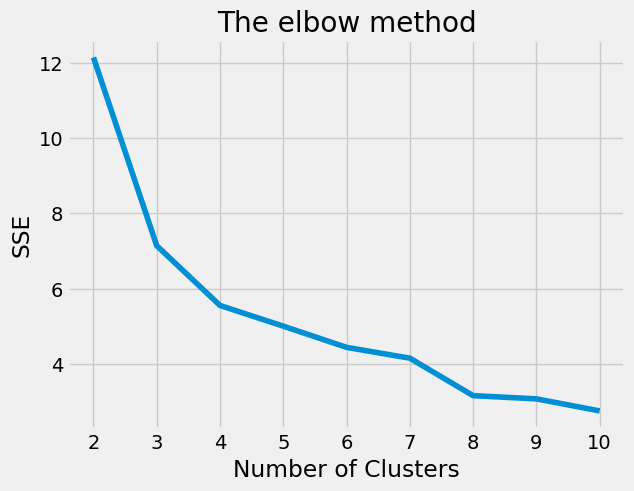

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

np.int64(4)

In [27]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada)

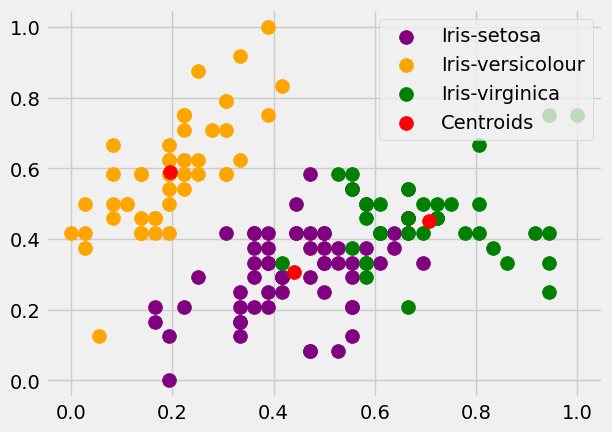

In [31]:
#Visualising the clusters
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

QUESTÃO 2

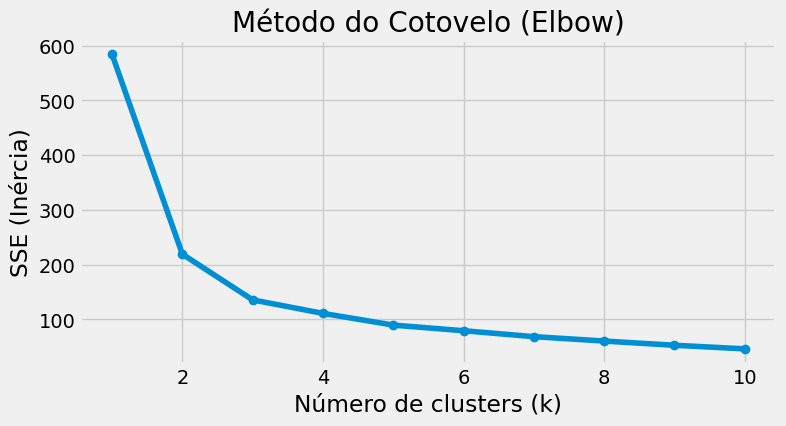

Número ideal de clusters (Elbow): 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init='auto' ou 10
    kmeans_elbow.fit(X_scaled)
    sse.append(kmeans_elbow.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Inércia)')
plt.title('Método do Cotovelo (Elbow)')
plt.grid(True)
plt.show()
kl = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
ideal_k_elbow = kl.elbow
print(f"Número ideal de clusters (Elbow): {ideal_k_elbow}")


Silhouette Score para k=2: 0.5803
Silhouette Score para k=3: 0.4663
Silhouette Score para k=4: 0.4147
Silhouette Score para k=5: 0.3606
Silhouette Score para k=6: 0.3487
Silhouette Score para k=7: 0.3588
Silhouette Score para k=8: 0.3528
Silhouette Score para k=9: 0.3684
Silhouette Score para k=10: 0.3596


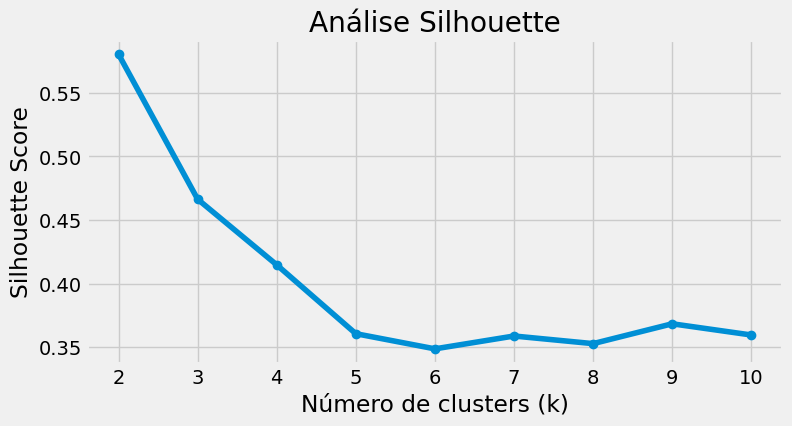

Número ideal de clusters (Silhouette): 2


In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range_silhouette = range(2, 11)
for k in k_range_silhouette:
    kmeans_sil = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_sil = kmeans_sil.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_sil)
    silhouette_scores.append(score)
    print(f"Silhouette Score para k={k}: {score:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Análise Silhouette')
plt.grid(True)
plt.show()

ideal_k_silhouette = k_range_silhouette[np.argmax(silhouette_scores)]
print(f"Número ideal de clusters (Silhouette): {ideal_k_silhouette}")
ideal_k = ideal_k_elbow if ideal_k_elbow else 3 


In [ ]:
kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df_no_outliers['cluster'] = labels
print(f"\nKMeans executado com k={ideal_k}")
print(df_no_outliers.head())



KMeans executado com k=3
   sepallength  sepalwidth  petallength  petalwidth        class  cluster
0          5.1         3.5          1.4         0.2  Iris-setosa        1
1          4.9         3.0          1.4         0.2  Iris-setosa        1
2          4.7         3.2          1.3         0.2  Iris-setosa        1
3          4.6         3.1          1.5         0.2  Iris-setosa        1
4          5.0         3.6          1.4         0.2  Iris-setosa        1


In [35]:
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=num_cols)
print("\nCentróides dos Clusters (valores originais):")
print(cluster_centers_df)

print("\nMédias das variáveis por cluster:")
print(df_no_outliers.groupby('cluster')[num_cols].mean())

print("\nContagem de instâncias por cluster:")
print(df_no_outliers['cluster'].value_counts())



Centróides dos Clusters (valores originais):
   sepallength  sepalwidth  petallength  petalwidth
0     6.806977    3.127907     5.539535    1.995349
1     4.976596    3.365957     1.463830    0.244681
2     5.866071    2.691071     4.444643    1.442857

Médias das variáveis por cluster:
         sepallength  sepalwidth  petallength  petalwidth
cluster                                                  
0           6.806977    3.127907     5.539535    1.995349
1           4.976596    3.365957     1.463830    0.244681
2           5.866071    2.691071     4.444643    1.442857

Contagem de instâncias por cluster:
cluster
2    56
1    47
0    43
Name: count, dtype: int64


QUESTÃO 5

In [36]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, labels)
print(f"\nDavies-Bouldin Score para k={ideal_k}: {db_score:.4f}")




Davies-Bouldin Score para k=3: 0.8325


QUESTÃO 6

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)
print(f"\nDBSCAN encontrou {n_clusters_dbscan} clusters e {n_noise} pontos de ruído.")
df_no_outliers['dbscan_cluster'] = db_labels
print(df_no_outliers.head())



DBSCAN encontrou 2 clusters e 43 pontos de ruído.
   sepallength  sepalwidth  petallength  petalwidth        class  cluster  \
0          5.1         3.5          1.4         0.2  Iris-setosa        1   
1          4.9         3.0          1.4         0.2  Iris-setosa        1   
2          4.7         3.2          1.3         0.2  Iris-setosa        1   
3          4.6         3.1          1.5         0.2  Iris-setosa        1   
4          5.0         3.6          1.4         0.2  Iris-setosa        1   

   dbscan_cluster  
0               0  
1               0  
2               0  
3               0  
4               0  


QUESTÃO 7

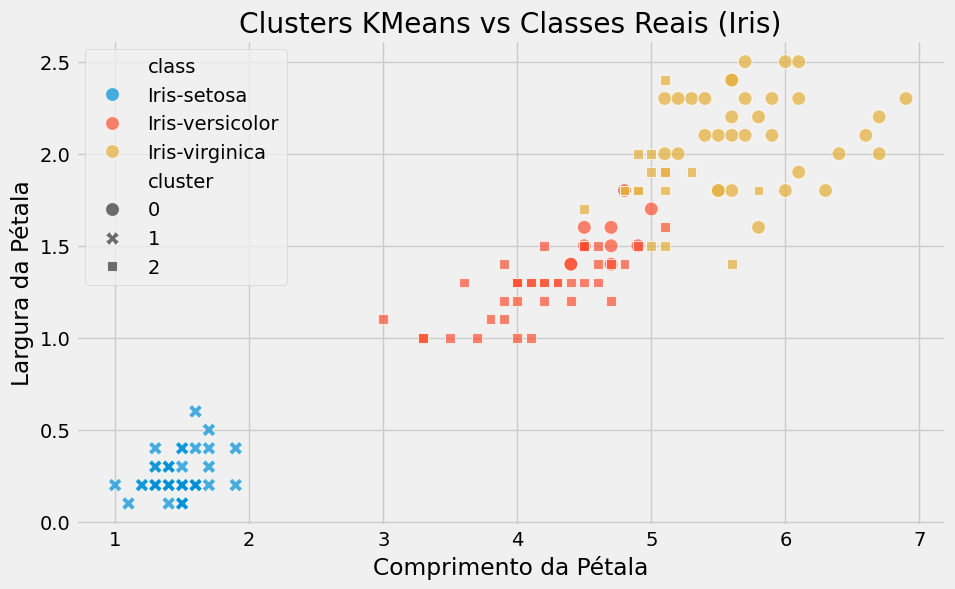


Distribuição das classes reais dentro de cada cluster KMeans:
cluster           0   1   2
class                      
Iris-setosa       0  47   0
Iris-versicolor  10   0  39
Iris-virginica   33   0  17


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_no_outliers['true_label_num'] = df_no_outliers['class'].map(class_mapping)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='petallength', y='petalwidth',
                hue='class',
                style='cluster', 
                s=100, alpha=0.7)
plt.title('Clusters KMeans vs Classes Reais (Iris)')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.grid(True)
plt.show()
print("\nDistribuição das classes reais dentro de cada cluster KMeans:")
print(pd.crosstab(df_no_outliers['class'], df_no_outliers['cluster']))
